In [ ]:
#PREPROCESSING (mounted data, install library, tokenize)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Install Library
!pip install vaderSentiment

     |████████████████████████████████| 133kB 6.8MB/s 


In [ ]:
# Import Library
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
pip install nltk

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anisajelita","key":"496d852f0c82bf5a658fc4f72ecdd592"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#intall dataset
!kaggle datasets download -d gapple/goodreads-book-reviews-20k

goodreads-book-reviews-20k.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "goodreads-book-reviews-20k.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Selesai di ekstak')

Selesai di ekstak


In [ ]:
pip install xlrd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import time
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem import PorterStemmer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
import pandas as pd
data1 = pd.read_excel('all_data.xlsx')
data1.head()

,book_title,Book_series,book_series_url,book_image,book_image_url,book_rating,book_author,author_url,genre,reviewer_name,reviewer_url,reviewer_image,reviewer_image_url,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",emma,https://www.goodreads.com/user/show/32879029-emma,https://images.gr-assets.com/users/1520568130p...,https://www.goodreads.com/user/show/32879029-emma,202.\nThatâ€™s the number of times that the wo...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),https://www.goodreads.com/user/show/42130592-e...,https://images.gr-assets.com/users/1538507799p...,https://www.goodreads.com/user/show/42130592-e...,I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Cait â€¢ A Page with a View,https://www.goodreads.com/user/show/47412532-c...,https://images.gr-assets.com/users/1523134490p...,https://www.goodreads.com/user/show/47412532-c...,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,https://www.goodreads.com/user/show/6688207-na...,https://images.gr-assets.com/users/1339730817p...,https://www.goodreads.com/user/show/6688207-na...,"3.75 stars\n""Rhys stepped off the stairs and t...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Emily May,https://www.goodreads.com/user/show/4622890-em...,https://images.gr-assets.com/users/1528390751p...,https://www.goodreads.com/user/show/4622890-em...,I wish so much that I could tell you I loved t...,5


In [ ]:
data1 = data1[['review', 'book_rating']]
data1.head()

,review,book_rating
0,202.\nThatâ€™s the number of times that the wo...,4.51
1,I need a black silk robe and a balcony to wear...,4.51
2,THIS BOOK TOTALLY WRECKED ME. In the best poss...,4.51
3,"3.75 stars\n""Rhys stepped off the stairs and t...",4.51
4,I wish so much that I could tell you I loved t...,4.51


In [ ]:
review = data1['review'][4]

In [ ]:
#tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.word_tokenize(review)

['I',
 'wish',
 'so',
 'much',
 'that',
 'I',
 'could',
 'tell',
 'you',
 'I',
 'loved',
 'this',
 'book',
 '...',
 'but',
 'I',
 'just',
 'did',
 "n't",
 '.',
 'After',
 'thinking',
 'A',
 'Court',
 'of',
 'Mist',
 'and',
 'Fury',
 'was',
 'such',
 'a',
 'huge',
 'improvement',
 'from',
 'A',
 'Court',
 'of',
 'Thorns',
 'and',
 'Roses',
 ',',
 'I',
 'was',
 'really',
 'excited',
 'for',
 'this',
 'third',
 'installment',
 '.',
 'I',
 'even',
 'preordered',
 'it',
 '.',
 'But',
 'I',
 'really',
 'struggled',
 'to',
 'get',
 'into',
 'the',
 'book',
 'from',
 'the',
 'very',
 'start',
 '.',
 'From',
 'pacing',
 'issues',
 'to',
 'awkward',
 'sex',
 'scenes',
 'that',
 'did',
 'nothing',
 'for',
 'me',
 ',',
 'it',
 'was',
 'one',
 'disappointment',
 'after',
 'another',
 '.',
 'I',
 "'ve",
 'said',
 'this',
 'before',
 'but',
 'I',
 'really',
 'dislike',
 'Maas',
 "'s",
 'sex',
 'scenes',
 '.',
 'At',
 'her',
 'best',
 ',',
 'she',
 'writes',
 'them',
 'strangely',
 'with',
 'words',
 

In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
review = data1['review'][4]
hasil = review.translate(str.maketrans('','',string.punctuation)).lower()

tokens = nltk.tokenize.word_tokenize(hasil)
kemunculan = nltk.FreqDist(tokens)
oke = kemunculan.most_common()
print(oke)

[('and', 23), ('i', 21), ('the', 19), ('a', 18), ('was', 13), ('of', 11), ('to', 11), ('this', 10), ('it', 9), ('but', 8), ('with', 8), ('in', 8), ('for', 7), ('book', 6), ('scenes', 6), ('up', 6), ('is', 6), ('how', 6), ('that', 5), ('sex', 5), ('at', 5), ('her', 5), ('they', 5), ('from', 4), ('really', 4), ('another', 4), ('feyre', 4), ('will', 4), ('not', 4), ('its', 4), ('so', 3), ('much', 3), ('just', 3), ('after', 3), ('pacing', 3), ('like', 3), ('were', 3), ('thing', 3), ('are', 3), ('be', 3), ('maas', 3), ('or', 3), ('lot', 3), ('more', 3), ('some', 3), ('part', 3), ('kind', 3), ('can', 3), ('series', 3), ('tell', 2), ('loved', 2), ('didnt', 2), ('thinking', 2), ('court', 2), ('such', 2), ('start', 2), ('awkward', 2), ('me', 2), ('one', 2), ('maass', 2), ('she', 2), ('words', 2), ('here', 2), ('rhysand', 2), ('there', 2), ('no', 2), ('tension', 2), ('which', 2), ('boring', 2), ('about', 2), ('these', 2), ('same', 2), ('time', 2), ('picked', 2), ('as', 2), ('where', 2), ('obviou

In [ ]:
#stopword
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
listStopword = set(stopwords.words('english'))

removed = []
for t in kemunculan:
  if t not in listStopword:
    removed.append(t)

print(removed)

['wish', 'much', 'could', 'tell', 'loved', 'book', 'didnt', 'thinking', 'court', 'mist', 'fury', 'huge', 'improvement', 'thorns', 'roses', 'really', 'excited', 'third', 'installment', 'even', 'preordered', 'struggled', 'get', 'start', 'pacing', 'issues', 'awkward', 'sex', 'scenes', 'nothing', 'one', 'disappointment', 'another', 'ive', 'said', 'dislike', 'maass', 'best', 'writes', 'strangely', 'words', 'like', 'branding', 'claiming', 'plain', 'icky', 'talk', 'mates', 'growling', 'purring', 'climaxing', 'stroking', 'anothers', 'wings', 'felt', 'id', 'walked', 'two', 'animals', 'rutting', 'mud', 'ugh', 'thing', 'feyre', 'rhysand', 'already', 'mated', 'eyeballs', 'sexual', 'tension', 'theywont', 'made', 'boring', 'whats', 'strange', 'manage', 'somehow', 'graphic', 'coy', 'time', 'maas', 'never', 'actually', 'uses', 'explicit', 'young', 'kid', 'picked', 'might', 'assume', 'dancing', 'playing', 'instrument', 'touch', 'turned', 'different', 'exploring', 'broad', 'strokes', 'featherlight', 'on

In [ ]:
# Merubah keseluruhan kalimat di kolom yang dipilih menjadi huruf kecil
data1['review'] = data1['review'].str.lower()

In [ ]:
#LOGISTIC REGRESSION

In [ ]:
data1 = data1[['review', 'book_rating']]
data1.head()

,review,book_rating
0,202.\nThatâ€™s the number of times that the wo...,4.51
1,I need a black silk robe and a balcony to wear...,4.51
2,THIS BOOK TOTALLY WRECKED ME. In the best poss...,4.51
3,"3.75 stars\n""Rhys stepped off the stairs and t...",4.51
4,I wish so much that I could tell you I loved t...,4.51


In [ ]:
data1.isna().mean()

review         0.034464
book_rating    0.000000
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


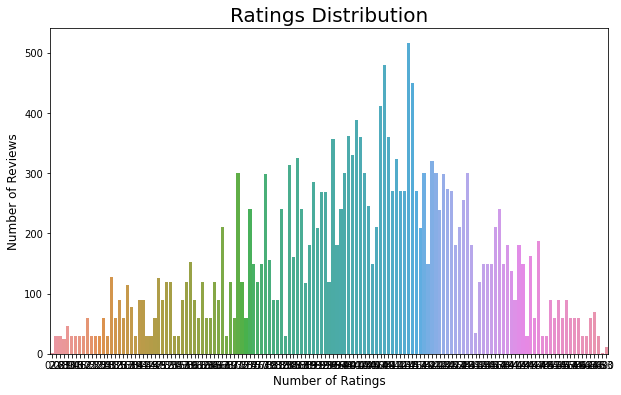

In [ ]:
stars_count = data1['book_rating'].value_counts()
stars_count = stars_count.sort_index()

fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(stars_count.index, stars_count.values)
plt.title("Ratings Distribution",fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.xlabel('Number of Ratings', fontsize = 12);

In [ ]:
data1=data1[data1.book_rating != 3]

pd.set_option('mode.chained_assignment', None)
data1["labels"] = data1["book_rating"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
data1 = data1.drop("book_rating",axis=1)

data1.head()

,review,labels
0,202.\nThatâ€™s the number of times that the wo...,0
1,I need a black silk robe and a balcony to wear...,0
2,THIS BOOK TOTALLY WRECKED ME. In the best poss...,0
3,"3.75 stars\n""Rhys stepped off the stairs and t...",0
4,I wish so much that I could tell you I loved t...,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


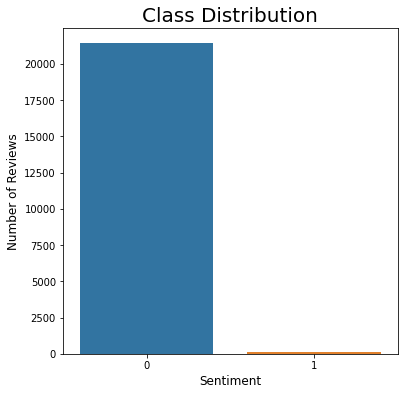

In [ ]:
label_count = data1['labels'].value_counts()
label_count = label_count.sort_index()

fig = plt.figure(figsize=(6, 6))
ax = sns.barplot(label_count.index, label_count.values)
plt.title("Class Distribution",fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.xlabel('Sentiment', fontsize = 12);

In [ ]:
print("{:.2f}".format(data1[data1.labels == 0].shape[0]/data1.shape[0]))

0.99


In [ ]:
train, test = train_test_split(data1, test_size = 0.3, stratify = data1['labels'], random_state = 42)

In [ ]:
punct = set(string.punctuation)

In [ ]:
def text_prep(review):
    #clean text
    review = re.sub(r"n't", " not ", review)
    review = re.sub(r"\'s", " ", review)
    review = re.sub(r"\'ve", " have ", review)
    review = re.sub(r"\'re", " are ", review)
    review = re.sub(r"\'d", " would ", review)
    review = re.sub(r"\'ll", " will ", review)
    
    #remove non-letters and lower case
    review = re.sub('[^a-z\s]', '', review.lower())
    
    #remove punctuation        
    punc_removed = [char for char in review if char not in punct]
    punc_removed = ''.join(punc_removed)
    
    return [word for word in punc_removed.split()]

In [ ]:
start_time = time.time()
cv= CountVectorizer(binary=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
cv.fit_transform(train['review'].values.astype('U'))
train_feature_set=cv.transform(train['review'].values.astype('U'))
test_feature_set=cv.transform(test['review'].values.astype('U'))
print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to convert text input into feature vector:  0.28  mins


In [ ]:
train_feature_set.shape[1]

14466

In [ ]:
cv.vocabulary_['love']

7628

In [ ]:
list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(1000)]

'bake'

In [ ]:
y_train = train['labels'].values
y_test = test['labels'].values

In [ ]:
start_time = time.time()
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to train model and make predictions:  0.01  mins


In [ ]:
#Matrix

In [ ]:
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.994
F1:  0.049


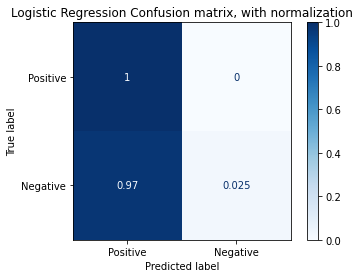

In [ ]:
disp = metrics.plot_confusion_matrix(lr, test_feature_set, y_test,
                                 display_labels=['Positive', 'Negative'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization');

In [ ]:
#REG

In [ ]:
#Change Title to String
data1['review'] = data1['review'].astype(str)

In [ ]:
# Import library for Text Analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in data1.iterrows():
  data1['review']
  ss = sid.polarity_scores(row['review'])
  listy.append(ss)
  
se = pd.Series(listy)
data1['polarity'] = se.values
display(data1.head(100))

,review,labels,polarity
0,202.\nThatâ€™s the number of times that the wo...,0,"{'neg': 0.144, 'neu': 0.701, 'pos': 0.155, 'co..."
1,I need a black silk robe and a balcony to wear...,0,"{'neg': 0.181, 'neu': 0.69, 'pos': 0.129, 'com..."
2,THIS BOOK TOTALLY WRECKED ME. In the best poss...,0,"{'neg': 0.081, 'neu': 0.772, 'pos': 0.147, 'co..."
3,"3.75 stars\n""Rhys stepped off the stairs and t...",0,"{'neg': 0.088, 'neu': 0.775, 'pos': 0.137, 'co..."
4,I wish so much that I could tell you I loved t...,0,"{'neg': 0.164, 'neu': 0.749, 'pos': 0.087, 'co..."
...,...,...,...
95,"5 STARS\nThank you, Eleanor Oliphant. Thank yo...",0,"{'neg': 0.073, 'neu': 0.779, 'pos': 0.148, 'co..."
96,"I'd rate this 4.5 stars.\nI'll admit, when I s...",0,"{'neg': 0.102, 'neu': 0.791, 'pos': 0.106, 'co..."
97,Eleanor Oliphant lives a fairly secluded life ...,0,"{'neg': 0.105, 'neu': 0.766, 'pos': 0.129, 'co..."
98,What an absolutely fantastic character Eleanor...,0,"{'neg': 0.036, 'neu': 0.779, 'pos': 0.186, 'co..."


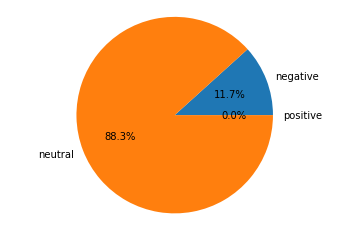

In [ ]:
# Pie Chart
import matplotlib.pyplot as plt
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()